# TASK - 3

## To Explore Unsupervised Machine Learning

From the given ‘Iris’ dataset, predict the optimum number of
clusters and represent it visually.

Dataset :
https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx6
6b10YiwK-/view?usp=sharing

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [2]:
data=pd.read_csv('iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


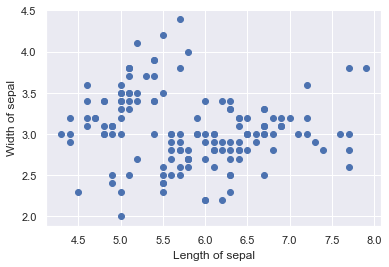

In [3]:
# Scatter plot with sepallength and sepalwidth
plt.scatter(data['SepalLengthCm'],data['SepalWidthCm'])

plt.xlabel('Length of sepal')
plt.ylabel('Width of sepal')
plt.show()


In [4]:
# Drop 'Id' unnecssary
data.drop(['Id'],inplace=True,axis=1)

In [5]:
# Mapping 'Species' with num
data['Species'] = data['Species'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

In [6]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [7]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
# Create a variable which will contain data for clustering
x1=data.copy()
kmeans = KMeans(3)
kmeans.fit(x,y)

KMeans(n_clusters=3)

In [10]:
# Create a copy of data inorder to cluster next to original data
cluster = data.copy()
# Predict cluster for each  observation
cluster['cluster_pred']=kmeans.fit_predict(x)
cluster

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster_pred
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,0
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


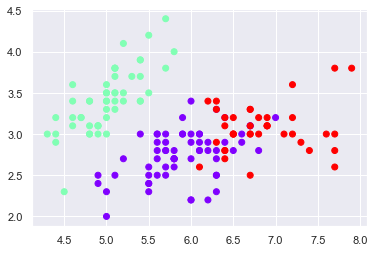

In [11]:
plt.scatter(cluster['SepalLengthCm'], cluster['SepalWidthCm'], c= cluster ['cluster_pred'], cmap = 'rainbow')
plt.show()


In [12]:
# Data Processing
from sklearn import preprocessing

# Scale the data
x_scaled = preprocessing.scale(x)

In [13]:
x_scaled

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [14]:
# Create k-means object with 2 clusters
kmeans_scaled = KMeans(2)
kmeans_scaled.fit(x_scaled)

KMeans(n_clusters=2)

In [15]:
# Creating a copy of data, so we can see clusters next to original data
cluster_scaled = data.copy()
cluster_scaled['cluster_pred']=kmeans_scaled.fit_predict(x_scaled)

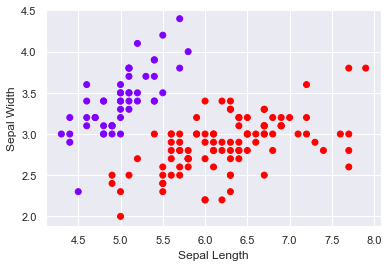

In [16]:
# Plotting the graph
plt.scatter(cluster_scaled['SepalLengthCm'], cluster_scaled['SepalWidthCm'], c= cluster_scaled['cluster_pred'], cmap = 'rainbow')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

In [17]:
# Elbow method
wcss = []
cl_num = 10
for i in range (1,cl_num):
    kmeans= KMeans(i)
    kmeans.fit(x_scaled)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss

[600.0000000000003,
 223.73200573676343,
 140.96837895511072,
 114.38954350297055,
 91.06677122728537,
 81.75658187204954,
 72.55701001632939,
 64.05814357947087,
 54.200748142572806]

Text(0, 0.5, 'Within cluster some of squares')

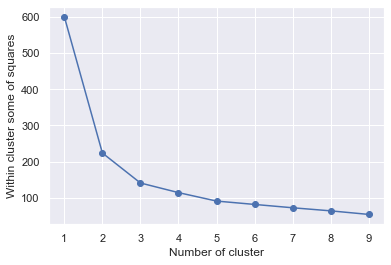

In [18]:
number_cluster = range(1,cl_num)
plt.plot(number_cluster, wcss, marker='o')
plt.xlabel('Number of cluster')
plt.ylabel('Within cluster some of squares')

In [19]:
# For 3 clusters
kmeans_3 = KMeans(3)
kmeans_3.fit(x_scaled)


KMeans(n_clusters=3)

In [20]:
# Copy the data
cluster_3 = x.copy()
cluster_3['cluster_pred']=kmeans_3.fit_predict(x_scaled)

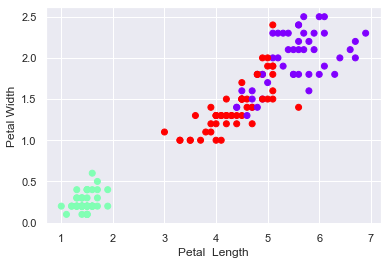

In [21]:
plt.scatter(cluster_3['PetalLengthCm'], cluster_3['PetalWidthCm'], c= cluster_3['cluster_pred'], cmap = 'rainbow')
plt.xlabel('Petal  Length')
plt.ylabel('Petal Width')
plt.show()


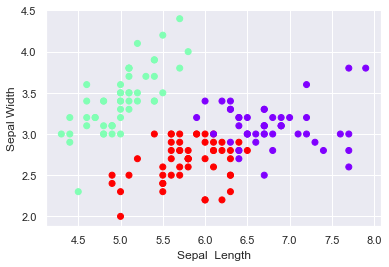

In [22]:
plt.scatter(cluster_3['SepalLengthCm'], cluster_3['SepalWidthCm'], c= cluster_3['cluster_pred'], cmap = 'rainbow')
plt.xlabel('Sepal  Length')
plt.ylabel('Sepal Width')
plt.show()

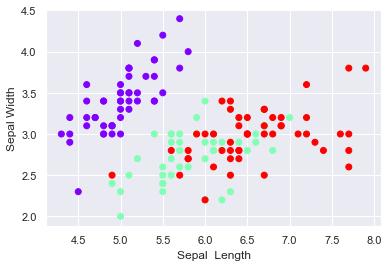

In [23]:
# According to real data, SepalLengthCm and SepalWidthCm
plt.scatter(data['SepalLengthCm'], data['SepalWidthCm'], c= data['Species'], cmap = 'rainbow')
plt.xlabel('Sepal  Length')
plt.ylabel('Sepal Width')
plt.show()

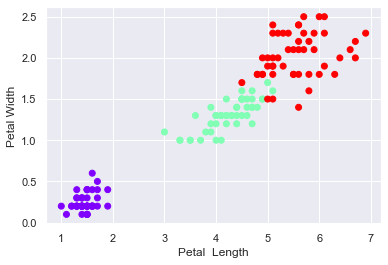

In [24]:
# According to real data, PetalLengthCm and PetalWidthCm
plt.scatter(data['PetalLengthCm'], data['PetalWidthCm'], c= data['Species'], cmap = 'rainbow')
plt.xlabel('Petal  Length')
plt.ylabel('Petal Width')
plt.show()